<a href="https://colab.research.google.com/github/zenilist/DataAnalytics/blob/main/A_Kar_Quiz2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This data science project will look at the automobile dataset that has been provided by the [UCI repo.](https://archive.ics.uci.edu/ml/datasets/Automobile)
The primary aim of this project would be to implement our skills relating to data preparation and feature engineering on the given dataset. 

#**Part 1: Data Loading and Summary**

There are 26 attributes in total. 
Attribute Information:

| Attribute:             | Attribute Range:                                                                                                                                                                                |   |   |   |
|------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---|---|---|
| 1. symboling:          | -3, -2, -1, 0, 1, 2, 3.                                                                                                                                                                         |   |   |   |
| 2. normalized-losses:  | continuous from 65 to 256.                                                                                                                                                                      |   |   |   |
| 3. make:               | alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo  |   |   |   |
| 4. fuel-type:          | diesel, gas.                                                                                                                                                                                    |   |   |   |
| 5. aspiration:         | std, turbo.                                                                                                                                                                                     |   |   |   |
| 6. num-of-doors:       | four, two.                                                                                                                                                                                      |   |   |   |
| 7. body-style:         | hardtop, wagon, sedan, hatchback, convertible.                                                                                                                                                  |   |   |   |
| 8. drive-wheels:       | 4wd, fwd, rwd.                                                                                                                                                                                  |   |   |   |
| 9. engine-location:    | front, rear.                                                                                                                                                                                    |   |   |   |
| 10. wheel-base:        | continuous from 86.6 120.9.                                                                                                                                                                     |   |   |   |
| 11. length:            | continuous from 141.1 to 208.1.                                                                                                                                                                 |   |   |   |
| 12. width:             | continuous from 60.3 to 72.3.                                                                                                                                                                   |   |   |   |
| 13. height:            | continuous from 47.8 to 59.8.                                                                                                                                                                   |   |   |   |
| 14. curb-weight:       | continuous from 1488 to 4066.                                                                                                                                                                   |   |   |   |
| 15. engine-type:       | dohc, dohcv, l, ohc, ohcf, ohcv, rotor.                                                                                                                                                         |   |   |   |
| 16. num-of-cylinders:  | eight, five, four, six, three, twelve, two.                                                                                                                                                     |   |   |   |
| 17. engine-size:       | continuous from 61 to 326.                                                                                                                                                                      |   |   |   |
| 18. fuel-system:       | 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.                                                                                                                                                   |   |   |   |
| 19. bore:              | continuous from 2.54 to 3.94.                                                                                                                                                                   |   |   |   |
| 20. stroke:            | continuous from 2.07 to 4.17.                                                                                                                                                                   |   |   |   |
| 21. compression-ratio: | continuous from 7 to 23.                                                                                                                                                                        |   |   |   |
| 22. horsepower:        | continuous from 48 to 288.                                                                                                                                                                      |   |   |   |
| 23. peak-rpm:          | continuous from 4150 to 6600.                                                                                                                                                                   |   |   |   |
| 24. city-mpg:          | continuous from 13 to 49.                                                                                                                                                                       |   |   |   |
| 25. highway-mpg:       | continuous from 16 to 54.                                                                                                                                                                       |   |   |   |
| 26. price:             | continuous from 5118 to 45400.                                                                                                                                                                  |   |   |   |
                                                                
                          source: (https://archive.ics.uci.edu/ml/machine-learning-databases/autos/)

In [228]:
# import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#read the dataset and check headers
df = pd.read_csv("https://raw.githubusercontent.com/zenilist/DataAnalytics/main/imports-85.data", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


The data set is missing column names so we should add them.

In [229]:
#store columns in a list and apply it to the series
columns = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
df.columns = columns
#check if columns have been added correctly
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [230]:
#count the unique numeric/qualitative values of each attribute
df.nunique()

symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            60
peak-rpm              24
city-mpg              29
highway-mpg           30
price                187
dtype: int64

An interesting thing to note is that there are 7 unique cylinder values. Some of the cars have odd number of cylinders of 3 or 5. This is very unusual since odd cylinders might cause [an end-to-end rocking motion at crankshaft speed.](https://mechanics.stackexchange.com/questions/17281/why-are-most-engines-made-with-even-numbers-of-cylinders#:~:text=Straight%20engines%20with%20an%20odd,in%20a%20straight-three%20engine.)

In [231]:
#check data type of each attribute
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

It is odd that numeric attributes like normalized-losses, bore, stroke, horsepower and peak-rpm are stored as object types.

In [232]:
#replace earlier seen question marks
df.replace('?',np.NaN, inplace=True)

In [233]:
#check if there is any null
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

#*Part 2: Exploratory Data Analysis

**Statistics and graphical counts of all nominal attributes**:

In [178]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


The median of symboling is 1, which means that according to the scale of -3 to 3, the cars present in the dataset are leaning towards more risky as determined by the acturians would have done the evaluation.

We need to convert some of earlier mentioned attributes.

In [179]:
#Convert to numeric data source and show statistics: https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
object_float = ['normalized-losses', 'bore', 'stroke', 'horsepower','peak-rpm']
#df_of = df[object_float].apply(pd.to_numeric)
#df_of.describe()
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'])
df['bore'] = pd.to_numeric(df['bore'])
df['stroke'] = pd.to_numeric(df['stroke'])
df['horsepower'] = pd.to_numeric(df['horsepower'])
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'])
df['price'] = pd.to_numeric(df['price'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f678fba8150>,
      dtype=object)

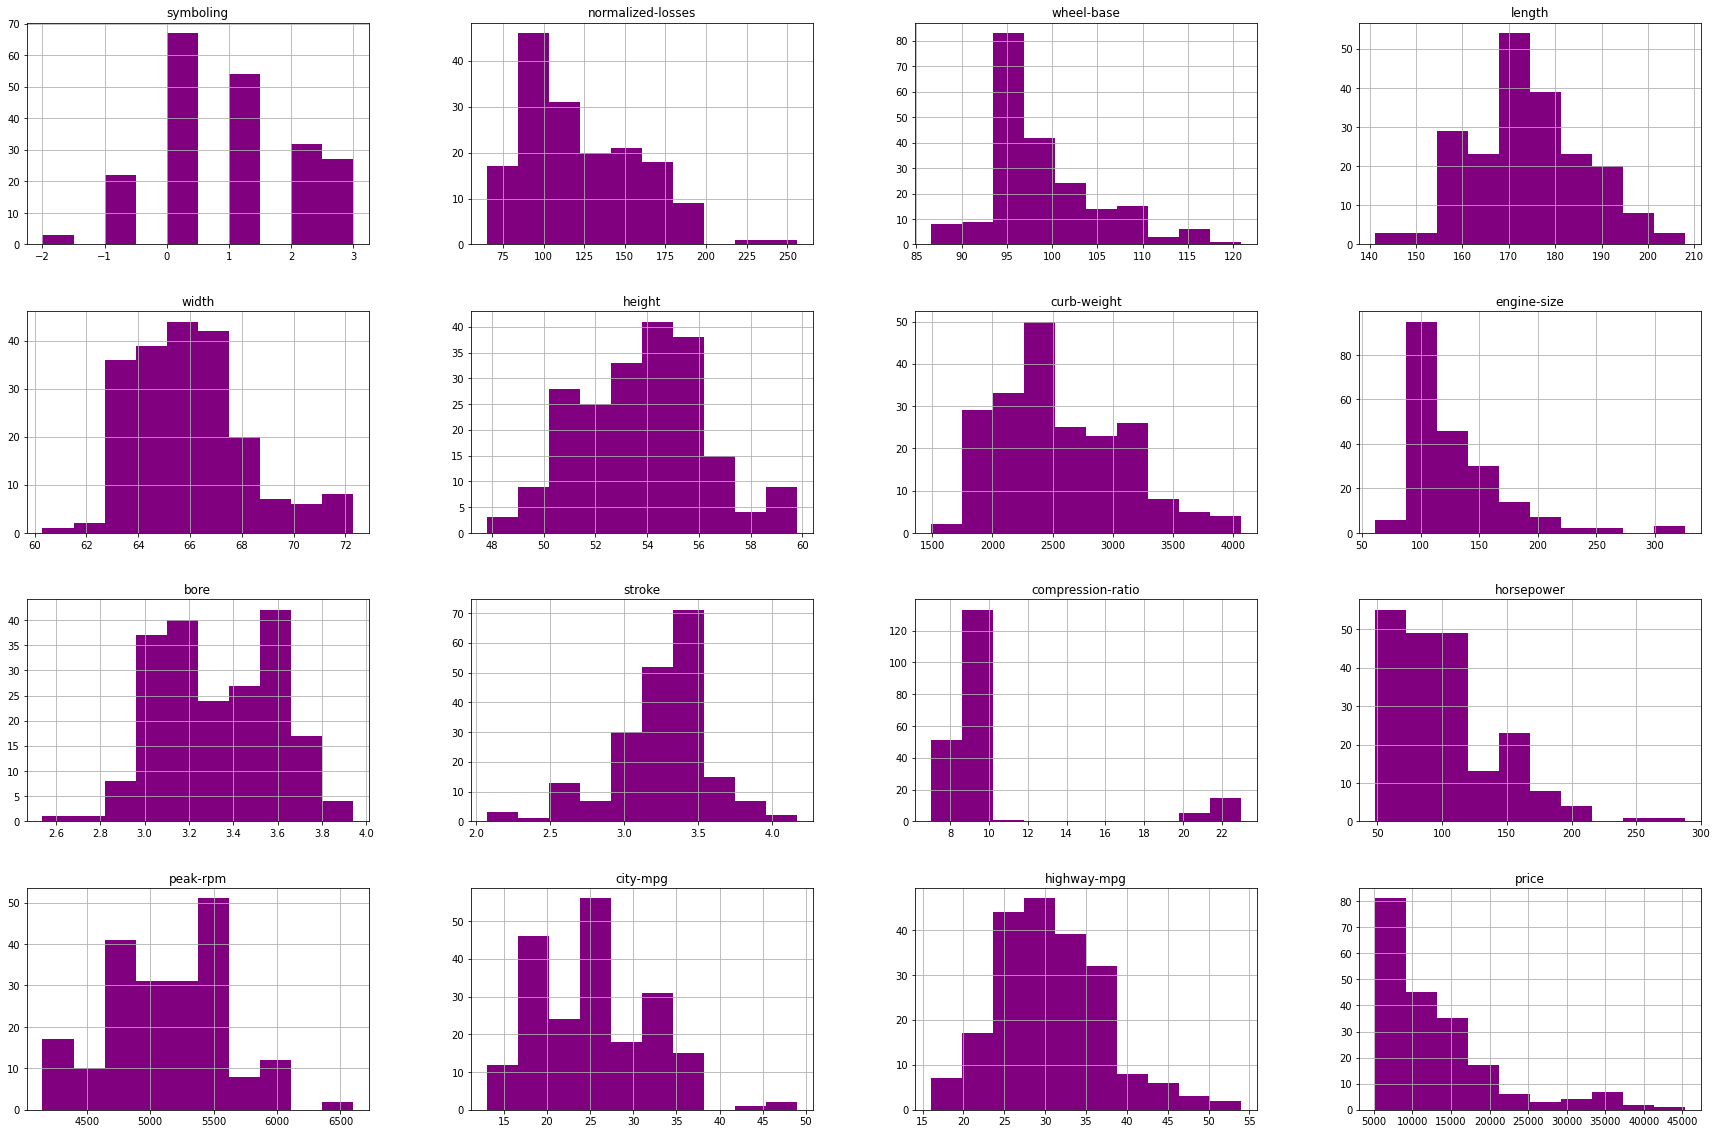

In [180]:
df.hist(figsize=(30,20), color='Purple')

Few cars have very high compression ratio compared to the mean and median of 10 and 9 respectively.
Few cars have very good city fuel efficieny beating the mean of 25mpg.

**Categorical attribute analysis**

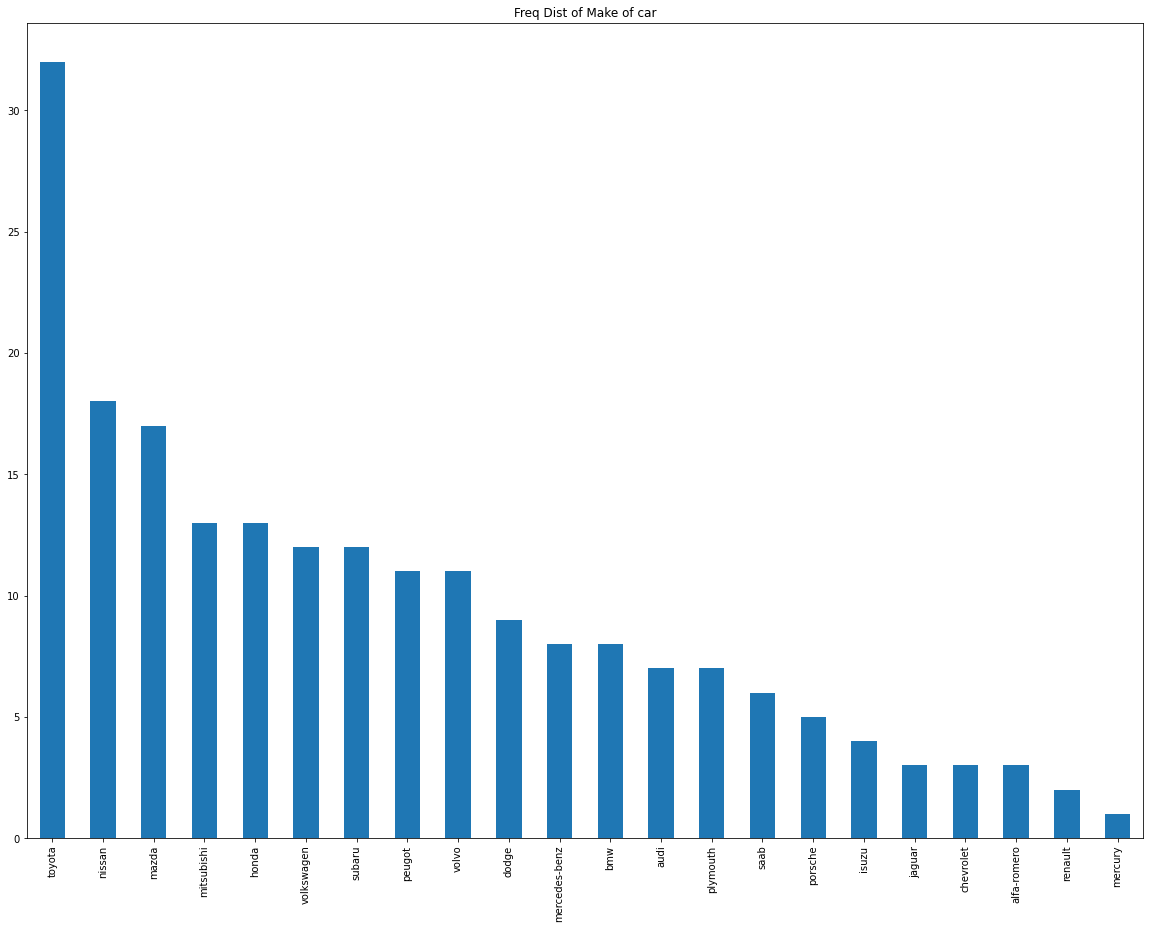

In [181]:
df['make'].value_counts().plot.bar(title = "Freq Dist of Make of car", figsize=(20,15))

Top 5 most popular makes are japanese car companies. Toyota is disproportionately higher than its close competitors.

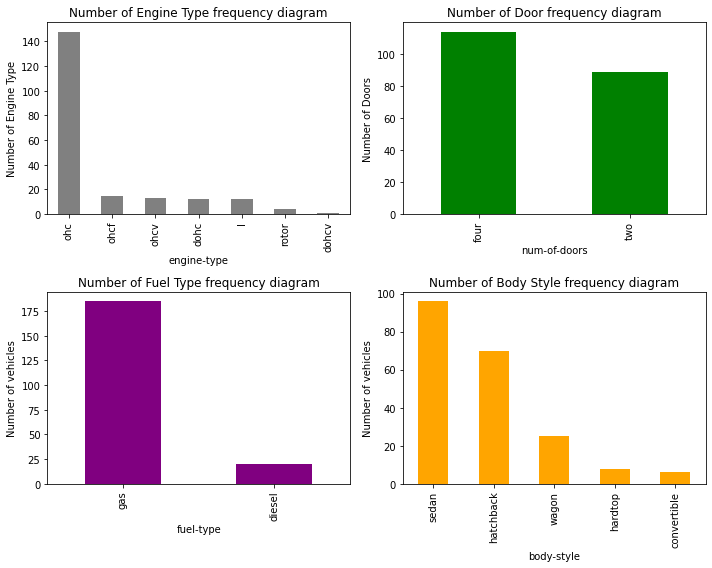

In [182]:
#Code source: https://www.kaggle.com/code/shubhamsinghgharsele/exploratory-data-analysis-on-automobile-dataset/notebook

plt.figure(1)
plt.subplot(221)
df['engine-type'].value_counts().plot(figsize=(10,8),kind='bar',color='grey')
plt.title("Number of Engine Type frequency diagram")
plt.ylabel('Number of Engine Type')
plt.xlabel('engine-type');


plt.subplot(222)
df['num-of-doors'].value_counts().plot(figsize=(10,8),kind='bar',color='green')
plt.title("Number of Door frequency diagram")
plt.ylabel('Number of Doors')
plt.xlabel('num-of-doors');

plt.subplot(223)
df['fuel-type'].value_counts().plot(figsize=(10,8),kind='bar',color='purple')
plt.title("Number of Fuel Type frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('fuel-type');

plt.subplot(224)
df['body-style'].value_counts().plot(figsize=(10,8),kind='bar',color='orange')
plt.title("Number of Body Style frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('body-style');
plt.tight_layout()
plt.show()

Very few automobiles use diesel as it's fuel. 
Sedan is the most popular body style, followed by hatchback. It is surprising that this dataset does not have any SUV but after close inspection it is found that the study was done in 1985 when SUVs were just invented.


**Multivariate Analysis**

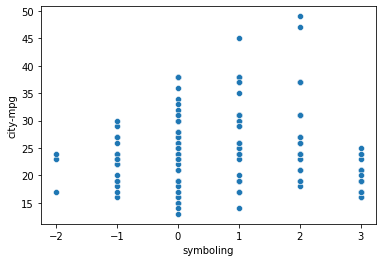

In [183]:
sns.scatterplot(data=df, y="city-mpg",x="symboling")

This this an interesting evaluation since we get a bell curve between the safety rating and city-mpg.
Both the most safe and least safe automobiles in this dataset have relatively low city fuel efficiency compared to cars closer to the median safely rating(symboling).

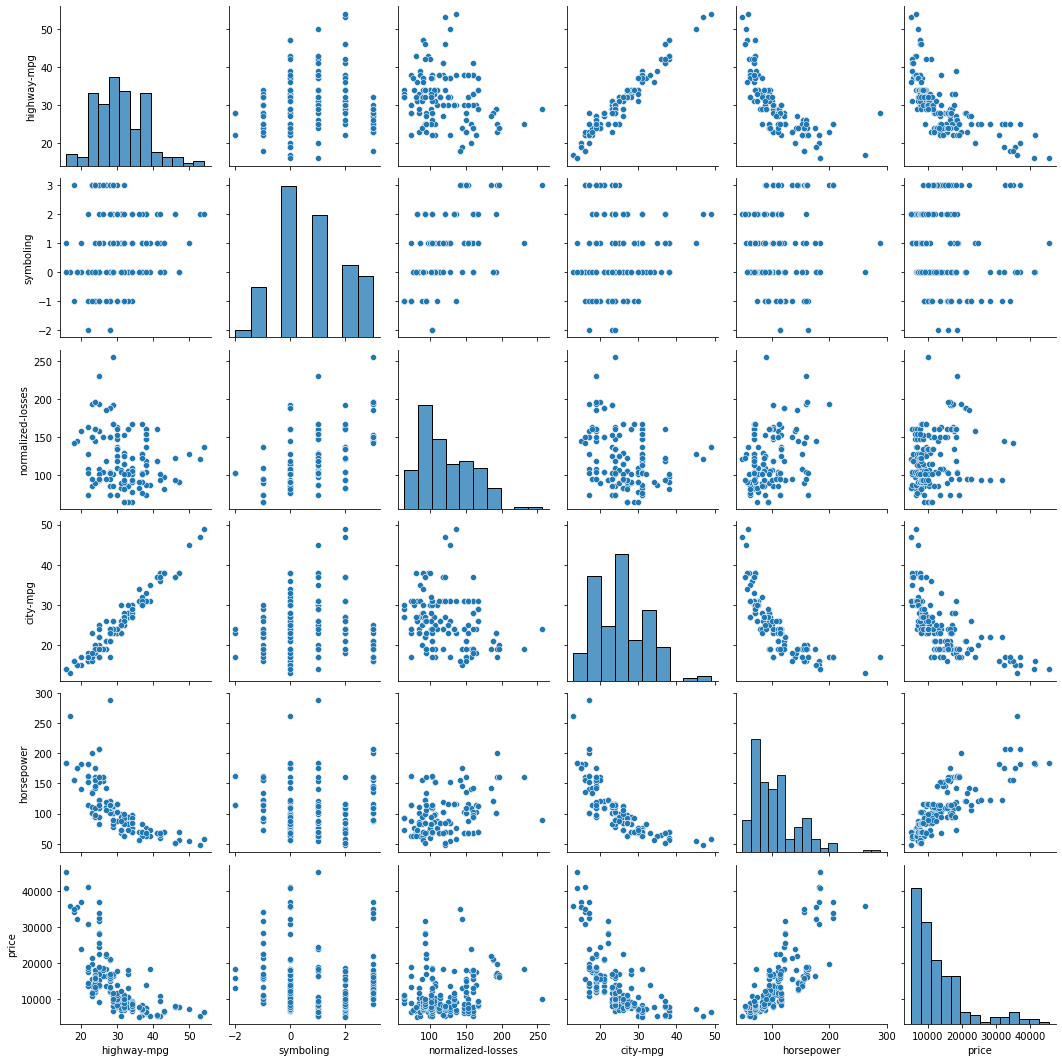

In [184]:
#code documentation: https://pythonbasics.org/seaborn-pairplot/
sns.pairplot(df, vars=['highway-mpg','symboling','normalized-losses','city-mpg','horsepower','price'])


Both highway and city fuel efficiency is inversely related with price of the automobile.
Horsepower is inversely related with fuel efficiency attributes - city mpg and highway mpg, and has a strong correlation with price.
Highway and city mpg are have extremely similar effect against all other attributes, and as such should be dropped in the feature selection stage.

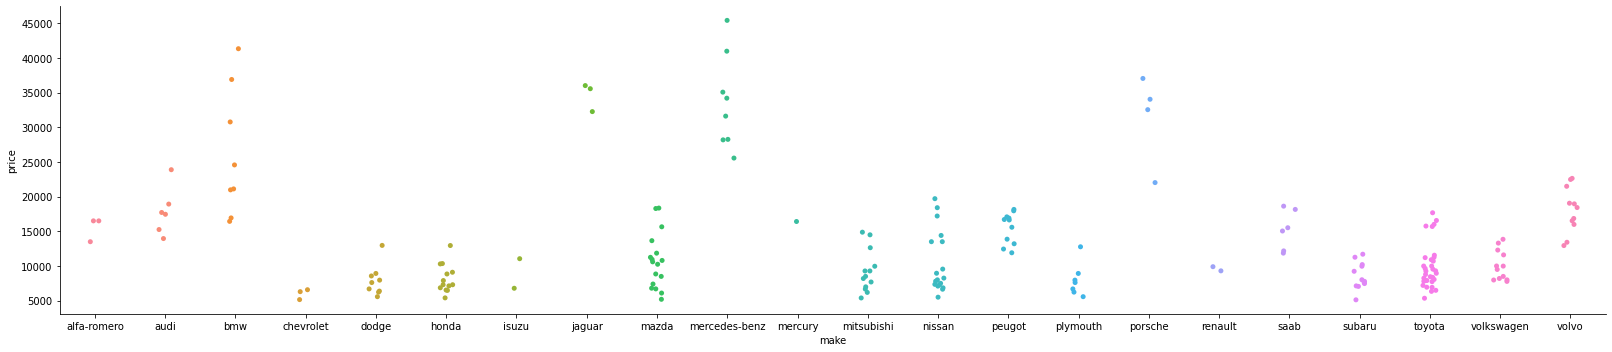

In [185]:
#documentation: https://seaborn.pydata.org/generated/seaborn.catplot.html
ax =sns.catplot(data=df, y='price',x='make', aspect=4.5, height = 5)

German car manufactures(audi,bmw, mercedes-benz) have more expensive cars while japanese automakers (honda, mazda, toyota, subaru) make more affordable cars.
Volkswagen is the only german automaker that competes with japanese automaker on the lower end price bracket. 

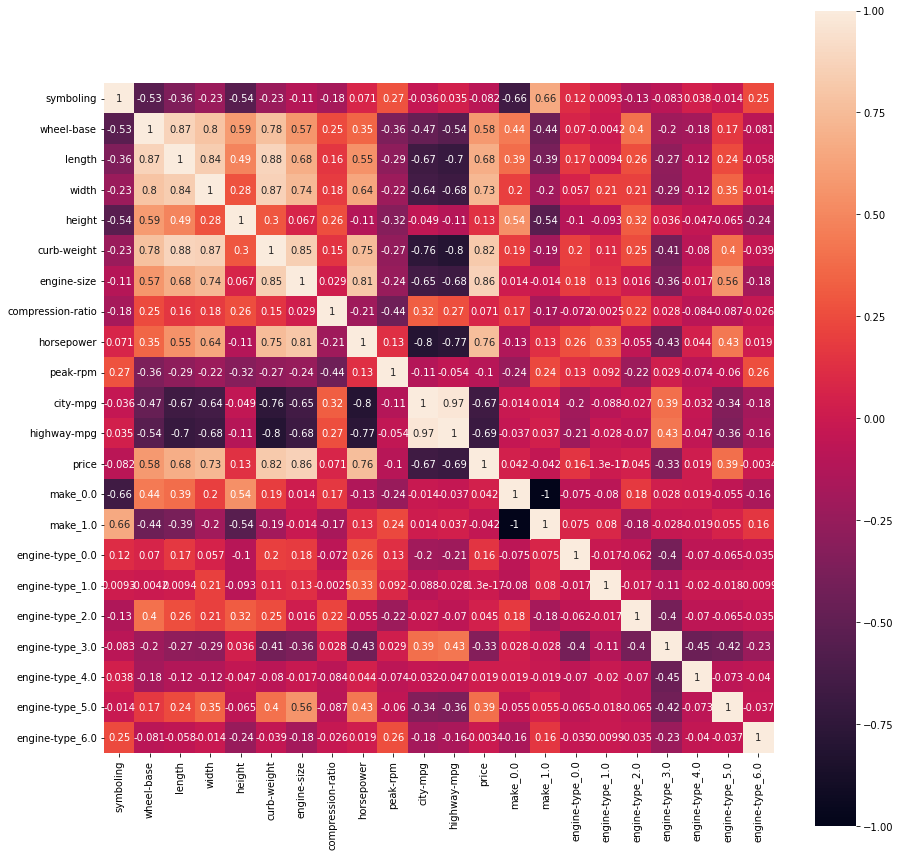

In [356]:
corr = df.corr()
ax = plt.subplots(figsize=(15,15))
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

1. Smaller cars with lower length and width seem to get better fuel economy. 
Height surprisely does not play a major role in affecting fuel efficiency.

2. Cars that are low in height and have a smaller wheel base are a lot more likely to be safe. In other words smaller automobiles in this dataset have a better safely rating.

3. 

#**Part 3: Data Preparation and Feature Engineering**

##**Question 1.** 
Which numeric variables contained within the data set appear to require the use of a
feature scaling method for purposes of preparing them for use within a machine learning algorithm?
Be sure to list each relevant variable and explain why you believe each variable that you’ve identified
requires the use of some sort of feature scaling method.


*All the numeric data apart from symoboling should be normalized to make it more effective in drawing comparisons between independent variables. Since all the numeric variables are scaled very differently, the comparisons are not may result in outliers which would be otherwise avoided if the range of the variables were equal. Thus, to model our data for use in a machine learning algorithm it is key that we first normalize these variables.*

## **Question 2.**
Consider the number-of-doors and price variables: Based on your EDA work, how many missing data values occur within each of these attributes? As we’ve learned, missing data values can impede the proper functioning of many machine learning algorithms. To address the missing the number-of-doors and price values, you have been instructed to formulate what you believe will be an effective data imputation approach for purposes of estimating reasonable proxies for the missing data values. Your supervisor tells you that the affected data observations MUST be retained within the data
set, and that it would be inappropriate to use either a mean, median, or mode value for any of the
missing values since doing so would increase the likelihood of introducing unwarranted bias within the
data set. Describe the imputation method you would employ for each variable. Then, using your
Python skills, apply your prescribed imputation methods to the variables. Be sure to include graphics
and commentary that explain your approach as well as the results of your efforts.


In [330]:
#check missing num of doors values
df['num-of-doors'].isnull().sum()

2

In [329]:
#check missing price values
df['price'].isnull().sum()

4

We are told not to use mean, median or mode as the imputation strategy for the missing values. Our goal is to keep bias as low as possible so after some [research](https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779), we have decided to use the k-NN imputation strategy since it would be much more accurate than mean, median and mode methods.

In [331]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
#documentation = https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html , reshape to -1,1 otherwise errors are thrown
price = df['price'].to_numpy().reshape(-1,1)
knn = KNNImputer(n_neighbors=3)
imputed_price  = knn.fit_transform(price)
df['price'] = imputed_price

#check if all NaN values have been correctly imputed
df['price'].isnull().sum()

0

For number of doors we would use the Simple impute KNN with most frequent strategy since KNNimputer has limited functionality with categorical variables.

In [332]:
#code source: https://stackoverflow.com/questions/64900801/implementing-knn-imputation-on-categorical-variables-in-an-sklearn-pipeline

num_of_doors = df['num-of-doors'].to_numpy().reshape(-1,1)
knn2 = SimpleImputer(strategy="most_frequent")
imputed_door  = knn2.fit_transform(num_of_doors)
df['num-of-doors'] = imputed_door

#check if all NaN values have been correctly imputed
df['num-of-doors'].isnull().sum()

0

## **Question 3:** 
Consider the engine-size and stroke variables:


 Describe the specific feature scaling method
you would apply to each of them.

For scaling the data we would we use normalization since the histograms of both stroke and engine -size do not adhere to the gaussian distribution.

In [191]:
from sklearn.preprocessing import MinMaxScaler

In [192]:
engine_size = df['engine-size'].to_numpy()
stroke = df['stroke'].to_numpy()
df_test = pd.DataFrame({'engine_size':engine_size,'stroke':stroke})
scaler = MinMaxScaler()
scaler.fit(df_test)
scaled = scaler.fit_transform(df_test)
scaled_df = pd.DataFrame(scaled, columns=df_test.columns)
print(scaled_df)

     engine_size    stroke
0       0.260377  0.290476
1       0.260377  0.290476
2       0.343396  0.666667
3       0.181132  0.633333
4       0.283019  0.633333
..           ...       ...
200     0.301887  0.514286
201     0.301887  0.514286
202     0.422642  0.380952
203     0.316981  0.633333
204     0.301887  0.514286

[205 rows x 2 columns]


Then, using Python, generate both a histogram and a boxplot for the
original content of these two variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f67929fbad0>]],
      dtype=object)

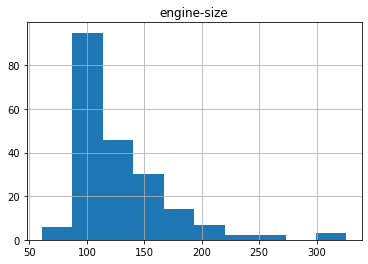

In [193]:
df.hist(['engine-size'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f67908c8f90>]],
      dtype=object)

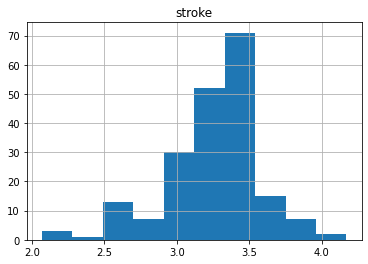

In [194]:
df.hist(['stroke'])

Next, apply your prescribed feature scaling methods to the two
variables and create histograms and boxplots that show the results of your feature scaling efforts

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


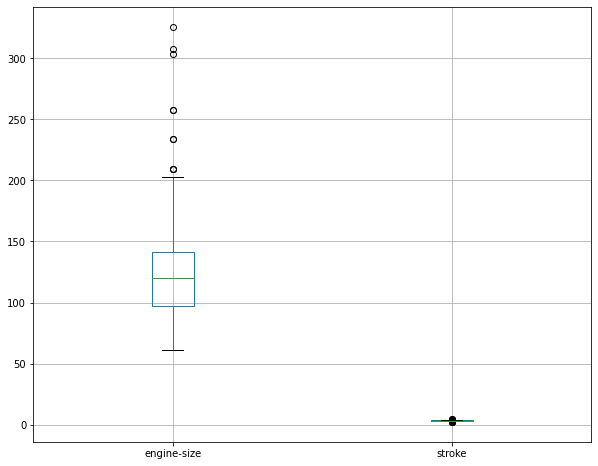

In [195]:
df.boxplot(column=['engine-size','stroke'], figsize=(10,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f678e29d550>,
      dtype=object)

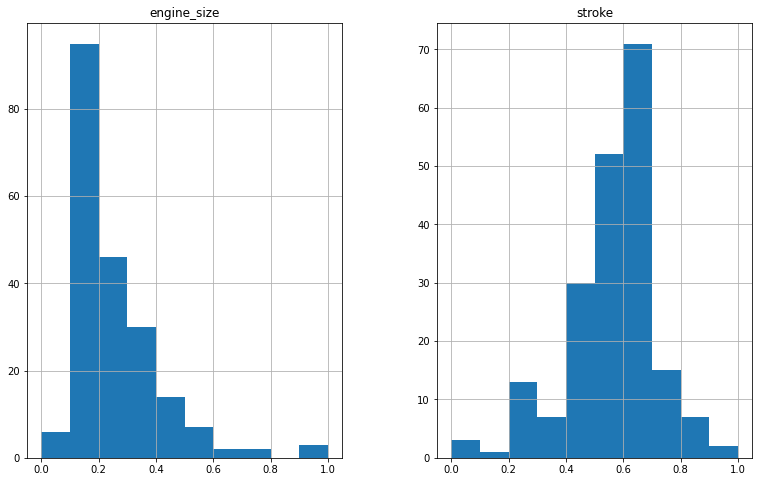

In [196]:
scaled_df.hist(figsize=(13,8))


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


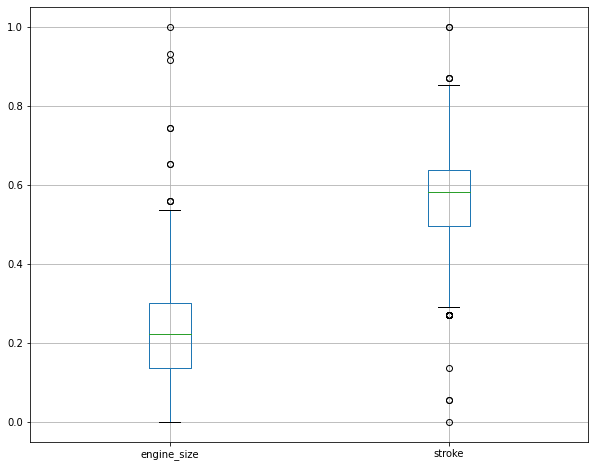

In [197]:
scaled_df.boxplot(figsize=(10,8))

Findings:
The difference between histograms is marginals but the visual difference after normalization is striking especially when comparing stroke via the box plot.
Overall, we would say that our feature scaling method using normalization made it much easier to draw insights from comparisons.

##**Question 4:**

Consider the symboling, make, and engine-type variables:



###A. 
For each variable, specify whether its content is numeric/continuous, numeric/discrete, categorical/nominal, or categorical/ordinal




*   Symboling - Numeric and Discrete
*   Make - Categorical and Nominal
*   Engine-type - Categorical and Nominal







### B. 
For each variable, describe the methodology you would employ for purposes of preparing its data
values for use within a machine learning algorithm.


For transforming the data, when it comes to symoboling since it's categorical and ordinal, we would use Label Encoding.
Whereas, for make and engine-type, since order doesn not matter for these two variables we could use get dummies.

###C. 
Using your Python skills, apply your prescribed data preparation methodologies to the three
variables. Be sure to show a sample of your results within your Notebook.


In [282]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

#transform symboling to a scale of 0-5 : best - worst.
symboling = df['symboling'].to_numpy()
label_encoding = preprocessing.LabelEncoder()
label_encoding = label_encoding.fit(symboling)
df['symboling'] = label_encoding.transform(df['symboling'].astype(int))
print(df['symboling'])


0      5
1      5
2      3
3      4
4      4
      ..
200    1
201    1
202    1
203    1
204    1
Name: symboling, Length: 205, dtype: int64


In [284]:
df = pd.get_dummies(df, columns=['make','engine-type'])
df

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,price,make_0.0,make_1.0,engine-type_0.0,engine-type_1.0,engine-type_2.0,engine-type_3.0,engine-type_4.0,engine-type_5.0,engine-type_6.0
0,5,NaN,gas,std,two,convertible,rwd,front,88.6,168.8,...,13495,0,1,1,0,0,0,0,0,0
1,5,NaN,gas,std,two,convertible,rwd,front,88.6,168.8,...,16500,0,1,1,0,0,0,0,0,0
2,3,NaN,gas,std,two,hatchback,rwd,front,94.5,171.2,...,16500,0,1,0,0,0,0,0,1,0
3,4,164,gas,std,four,sedan,fwd,front,99.8,176.6,...,13950,1,0,0,0,0,1,0,0,0
4,4,164,gas,std,four,sedan,4wd,front,99.4,176.6,...,17450,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,95,gas,std,four,sedan,rwd,front,109.1,188.8,...,16845,1,0,0,0,0,1,0,0,0
201,1,95,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,19045,1,0,0,0,0,1,0,0,0
202,1,95,gas,std,four,sedan,rwd,front,109.1,188.8,...,21485,1,0,0,0,0,0,0,1,0
203,1,95,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,22470,1,0,0,0,0,1,0,0,0


## Question 5.

Consider the wheel-base, length, width, height, curb-weight, engine-size, compression ratio,
horsepower, peak-rpm, and city-mpg variables. Using your dimensionality reduction expertise, use
Python to reduce the dimensionality of this group of variables to a set of new orthogonal features. Be
sure to include appropriate commentary explaining the dimensionality reduction method you have
elected to implement and discuss the results of your efforts. For example, you should explain how
many orthogonal features your approach has generated as well as how much variability is explained by
each of your new features.

As all the above listed variables are numeric and continuous it is a good idea to use Principal Componenets Analysis or PCA to reduce the dimensions of the data.

In [353]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import model_selection

#remove all NaNs from the variable set
horsepower = df['horsepower'].to_numpy().reshape(-1,1)
knn_horsepower = KNNImputer(n_neighbors=3)
imputed_horsepower  = knn_horsepower.fit_transform(horsepower)
df['horsepower'] = imputed_horsepower

peak_rpm = df['peak-rpm'].to_numpy().reshape(-1,1)
knn_peak_rpm = KNNImputer(n_neighbors=3)
imputed_peak_rpm  = knn.fit_transform(peak_rpm)
df['peak-rpm'] = imputed_peak_rpm

#check if NaN is replaced otherwise pca testing gives errors
print(df.isnull().sum())


pca = ['wheel-base','width','height','curb-weight','engine-size','compression-ratio','horsepower','peak-rpm','city-mpg']
df_pca = df[pca]
X = df_pca
y = df_pca.index

#X = df[pca]
#y = df

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.4, random_state=0)

pca = PCA(n_components=2)

z = pca.fit_transform(X_train)
df_pca = pd.DataFrame(z)



for i in pca.explained_variance_ratio_:
  print(format(i, 'f'))

symboling             0
normalized-losses    41
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
make_0.0              0
make_1.0              0
engine-type_0.0       0
engine-type_1.0       0
engine-type_2.0       0
engine-type_3.0       0
engine-type_4.0       0
engine-type_5.0       0
engine-type_6.0       0
dtype: int64
0.655916
0.342290


We can see that the variance is 65.5% with one pricipal component. When we add the second one, the variance becomes 99.8%.

In [345]:
#value of the principal components
print(pca.singular_values_)

[6619.05652315 4781.55620966]
